In [1]:
# Change all the "game" to whichever file you want to preprocess and save as

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [4]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,576030,0,0,76561198071587697,82,6,1,3.4,"October 29, 2021",great to get your brain working
1,576030,0,0,76561199198904472,4,1,1,18.2,"September 21, 2021","It was a neat, small experience that I enjoyed..."
2,576030,0,0,superganondorf,307,6,-1,8.3,"September 17, 2021",Literally doesn't work on my computer. I've sp...
3,576030,1,0,emberquill,683,8,1,4.1,"August 29, 2021",A fun game that takes you from building basic ...
4,576030,0,0,76561198014738614,7,1,1,310.2,"August 22, 2021",Really nice simulator


In [5]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [6]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [7]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,3.4,"October 29, 2021",great to get your brain working
1,0,0,1,18.2,"September 21, 2021","It was a neat, small experience that I enjoyed..."
2,0,0,-1,8.3,"September 17, 2021",Literally doesn't work on my computer. I've sp...
3,1,0,1,4.1,"August 29, 2021",A fun game that takes you from building basic ...
4,0,0,1,310.2,"August 22, 2021",Really nice simulator


In [8]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [9]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 29, 2021",great to get your brain working,0,0,3.4,1
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,18.2,1
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,8.3,-1
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,4.1,1
4,"August 22, 2021",Really nice simulator,0,0,310.2,1
5,"August 21, 2021",Sorry guys - no time for a detailed review atm...,0,0,19.2,1
6,"August 19, 2021",If you're into electrical and computer enginee...,0,0,49.1,1
7,"August 19, 2021","Do you recommend this game? I mean, kinda?It's...",0,0,3.0,-1
8,"August 15, 2021","Warning, minor game spoilers within.The core m...",1,0,5.1,1
9,"July 5, 2021",Not a lot to the game compared to a zachtronic...,0,0,8.1,1


In [10]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [11]:
import datetime as dt

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  242 non-null    object 
 1   Review_Text     242 non-null    object 
 2   Num_Helpful     242 non-null    int64  
 3   Num_Funny       242 non-null    int64  
 4   Hours_Played    242 non-null    float64
 5   Recommend       242 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 11.5+ KB


In [13]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_31408/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 29, 2021",great to get your brain working,0,0,3.4,1,1635465600
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,18.2,1,1632182400
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,8.3,-1,1631836800
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,4.1,1,1630195200
4,"August 22, 2021",Really nice simulator,0,0,310.2,1,1629590400


In [14]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_31408/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",great to get your brain working,0,0,3.4,1,1635465600,2704
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,18.2,1,1632182400,2698
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,8.3,-1,1631836800,2698
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,4.1,1,1630195200,2695
4,"August 22, 2021",Really nice simulator,0,0,310.2,1,1629590400,2694


In [15]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",great to get your brain working,0,0,3.4,1,1635465600,2704
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,18.2,1,1632182400,2698
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,8.3,-1,1631836800,2698
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,4.1,1,1630195200,2695
4,"August 22, 2021",Really nice simulator,0,0,310.2,1,1629590400,2694


## - Data Aggregation -

### Number of text reviews per day:

In [16]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 29, 2021",great to get your brain working
1,2698,"September 21, 2021","It was a neat, small experience that I enjoyed..."
2,2698,"September 17, 2021",Literally doesn't work on my computer. I've sp...
3,2695,"August 29, 2021",A fun game that takes you from building basic ...
4,2694,"August 22, 2021",Really nice simulator


In [17]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2453,"January 5, 2017",6
1,2453,"January 6, 2017",2
2,2453,"January 8, 2017",10
3,2453,"January 9, 2017",2
4,2454,"January 13, 2017",2
...,...,...,...
172,2694,"August 22, 2021",1
173,2695,"August 29, 2021",1
174,2698,"September 17, 2021",1
175,2698,"September 21, 2021",1


<AxesSubplot:>

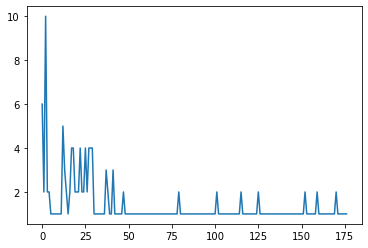

In [18]:
text_days['review_count'].plot()

In [19]:
# total number of text reviews
text_days['review_count'].sum()

242

In [20]:
# average number of text reviews per day
text_days['review_count'].mean()

1.3672316384180792

### Number of text reviews per week:

In [21]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2453,20
1,2454,4
2,2455,10
3,2456,8
4,2457,12
...,...,...
112,2693,1
113,2694,4
114,2695,1
115,2698,2


<AxesSubplot:>

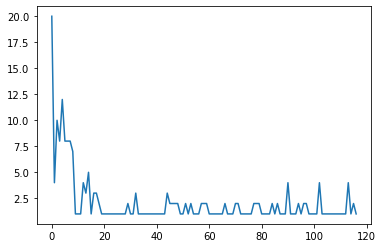

In [22]:
text_weeks['review_count'].plot()

In [23]:
# total number of text reviews
text_weeks['review_count'].sum()

242

In [24]:
# average number of text reviews per week
text_weeks['review_count'].mean()

2.0683760683760686

### Num_Helpful per week:

In [25]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",great to get your brain working,0,0,3.4,1,1635465600,2704
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,18.2,1,1632182400,2698
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,8.3,-1,1631836800,2698
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,4.1,1,1630195200,2695
4,"August 22, 2021",Really nice simulator,0,0,310.2,1,1629590400,2694


In [26]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2453,132
1,2454,10
2,2455,350
3,2456,20
4,2457,24
...,...,...
112,2693,1
113,2694,0
114,2695,1
115,2698,0


In [27]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2453,18,0,5.5,6.6
2454,7,1,1.0,2.5
2455,330,0,1.5,35.0
2456,10,0,1.5,2.5
2457,11,0,0.0,2.0
...,...,...,...,...
2693,1,1,1.0,1.0
2694,0,0,0.0,0.0
2695,1,1,1.0,1.0


In [28]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1410

In [29]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

5.8264462809917354

### Num_Funny per week:

In [30]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2453,2
1,2454,0
2,2455,10
3,2456,8
4,2457,2
...,...,...
112,2693,0
113,2694,0
114,2695,0
115,2698,0


In [31]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2453,1,0,0.0,0.100000
2454,0,0,0.0,0.000000
2455,8,0,0.0,1.000000
2456,5,0,0.0,1.000000
2457,1,0,0.0,0.166667
...,...,...,...,...
2693,0,0,0.0,0.000000
2694,0,0,0.0,0.000000
2695,0,0,0.0,0.000000


In [32]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

91

In [33]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.3760330578512397

### Hours_Played per week:

In [34]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2453,435.0
1,2454,57.0
2,2455,307.6
3,2456,76.0
4,2457,430.2
...,...,...
112,2693,5.1
113,2694,381.5
114,2695,4.1
115,2698,26.5


In [35]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2453,93.7,3.2,6.80,21.750
2454,27.8,2.3,13.45,14.250
2455,150.6,4.8,9.35,30.760
2456,16.8,3.3,9.55,9.500
2457,117.3,3.2,13.30,35.850
...,...,...,...,...
2693,5.1,5.1,5.10,5.100
2694,310.2,3.0,34.15,95.375
2695,4.1,4.1,4.10,4.100


In [36]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

4834.6

In [37]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

19.97768595041323

### Recommend per week:

In [38]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2453,1.0
1,2454,1.0
2,2455,1.0
3,2456,1.0
4,2457,1.0
...,...,...
112,2693,1.0
113,2694,0.5
114,2695,1.0
115,2698,0.0


In [39]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2453,1,1,1.0,1.0
2454,1,1,1.0,1.0
2455,1,1,1.0,1.0
2456,1,1,1.0,1.0
2457,1,1,1.0,1.0
...,...,...,...,...
2693,1,1,1.0,1.0
2694,1,-1,1.0,0.5
2695,1,1,1.0,1.0


In [40]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

192

In [41]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.7933884297520661

## Feature Scaling - Min-Max Normalization

In [42]:
df_min_max_scaled = df.copy()

In [43]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",great to get your brain working,0,0,3.4,1,1635465600,2704
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,18.2,1,1632182400,2698
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,8.3,-1,1631836800,2698
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,4.1,1,1630195200,2695
4,"August 22, 2021",Really nice simulator,0,0,310.2,1,1629590400,2694


In [44]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",great to get your brain working,0,0,0.010323,1.0,1.000000,2704
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,0.058065,1.0,0.978385,2698
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,0.026129,0.0,0.976109,2698
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,0.012581,1.0,0.965301,2695
4,"August 22, 2021",Really nice simulator,0,0,1.000000,1.0,0.961320,2694
...,...,...,...,...,...,...,...,...
237,"February 7, 2017",After having played around with redstone in Mi...,0,0,0.009677,1.0,0.018771,2457
238,"February 6, 2017","This game was quite fun, if you're in to logic...",0,0,0.207742,1.0,0.018203,2457
239,"February 6, 2017",It is not a game in a rigid way. It's a simula...,0,0,0.377742,1.0,0.018203,2457
240,"February 3, 2017",Always a pleasure refreshing university's memo...,1,1,0.052258,1.0,0.016496,2457


In [45]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
df_sorted = df_sorted.reset_index(drop=True)

In [48]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_31408/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [50]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",great to get your brain working,0,0,0.010323,1.0,1.000000,2704
1,"September 21, 2021","It was a neat, small experience that I enjoyed...",0,0,0.058065,1.0,0.978385,2698
2,"September 17, 2021",Literally doesn't work on my computer. I've sp...,0,0,0.026129,0.0,0.976109,2698
3,"August 29, 2021",A fun game that takes you from building basic ...,1,0,0.012581,1.0,0.965301,2695
4,"August 22, 2021",Really nice simulator,0,0,1.000000,1.0,0.961320,2694
5,"August 21, 2021",Sorry guys - no time for a detailed review atm...,0,0,0.061290,1.0,0.960751,2694
6,"August 19, 2021",If you're into electrical and computer enginee...,0,0,0.157742,1.0,0.959613,2694
7,"August 19, 2021","Do you recommend this game? I mean, kinda?It's...",0,0,0.009032,0.0,0.959613,2694
8,"August 15, 2021","Warning, minor game spoilers within.The core m...",1,0,0.015806,1.0,0.957338,2693
9,"July 5, 2021",Not a lot to the game compared to a zachtronic...,0,0,0.025484,1.0,0.934016,2687


In [51]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [52]:
df_text_list

Date_Epoch_Week
2453    [Nice little game where you are guided through...
2454    [This is a good game!11 hours in and I'm havin...
2455    [Enjoying this game so far. Has helped demysti...
2456    [Hard to call this 'a game', it's more of a ma...
2457    [This game is amazing. If you have even a slig...
2458    [Great game, as it comes to learning on self e...
2459    [Great game, but a bit short if you've worked ...
2460    [Coming from someone thats only just entering ...
2461    [Had a lot of issues with window mode. Wasn't ...
2462    [Great game if you want to delve in to logic g...
2463    [Pros:+ Learn how to build a CPU from the humb...
2467    [The final thing you make is rather hand holdi...
2469    [I struggled with giving the thumbs down here,...
2470    [Very cool!Good for first try for myself in ha...
2471    [Spanish:Este juego es simplemente genial. La ...
2473    [I enjoyed it. Felt a little barebones though....
2474    [MHRD is a fun little puzzle game about buildi..

In [53]:
# storing data in JSON format
df_text_list.to_json('mhrd_text.json', orient = 'split', compression = 'infer')

In [54]:
# reading the JSON file
game_text = pd.read_json('mhrd_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2453  [Nice little game where you are guided through...
1    Review_Text   2454  [This is a good game!11 hours in and I'm havin...
2    Review_Text   2455  [Enjoying this game so far. Has helped demysti...
3    Review_Text   2456  [Hard to call this 'a game', it's more of a ma...
4    Review_Text   2457  [This game is amazing. If you have even a slig...
5    Review_Text   2458  [Great game, as it comes to learning on self e...
6    Review_Text   2459  [Great game, but a bit short if you've worked ...
7    Review_Text   2460  [Coming from someone thats only just entering ...
8    Review_Text   2461  [Had a lot of issues with window mode. Wasn't ...
9    Review_Text   2462  [Great game if you want to delve in to logic g...
10   Review_Text   2463  [Pros:+ Learn how to build a CPU from the humb...
11   Review_Text   2467  [The final thing you make is rather hand holdi...
12   Review_Text   2469  

In [55]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('mhrd_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_31408/1923374230.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [56]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('mhrd_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_31408/4119895830.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [57]:
# storing data in CSV format
game_review = df_sorted.to_csv('mhrd_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])